# Based on https://cosmiccoding.com.au/tutorials/ab_tests

In [1]:
num_a, num_b = 550, 450
click_a, click_b = 48, 56
rate_a, rate_b = click_a / num_a, click_b / num_b

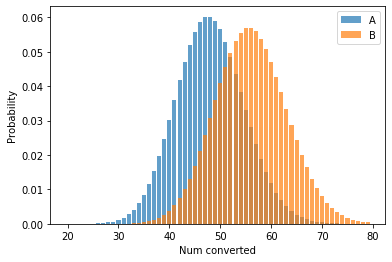

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

# Determine the probability of having x number of click throughs
clicks = np.arange(20, 80)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");

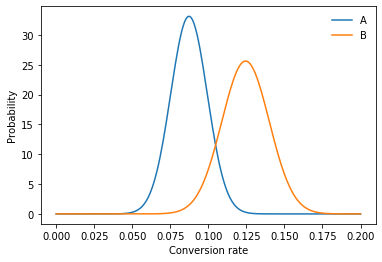

In [6]:
from scipy.stats import norm

std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

zscore is 1.890, with p-value 0.029


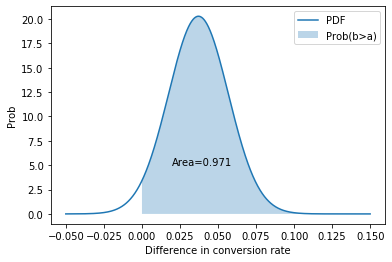

In [7]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

In [8]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.cdf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

0.9705973498275782


In [9]:
# Draw 10000 samples of possible rates for a and b
n = 10000
rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)
b_better = (rates_b > rates_a).sum() / n
print(f"B is better than A {b_better * 100:0.1f}% of the time")

B is better than A 97.3% of the time


# Welsch’s t-test

In [10]:
from scipy.stats import ttest_ind
a_dist = np.zeros(num_a)
a_dist[:click_a] = 1
b_dist = np.zeros(num_b)
b_dist[:click_b] = 1
zscore, prob = ttest_ind(a_dist, b_dist, equal_var=False)
print(f"Zscore is {zscore:0.2f}, p-value is {prob:0.3f} (two tailed), {prob/2:0.3f} (one tailed)")

Zscore is -1.89, p-value is 0.059 (two tailed), 0.030 (one tailed)


# Mann-Whitney U test

In [11]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis B <= A is 0.028
